# Librerías

In [38]:
!pip3 install numpy
!pip3 install pandas
!pip3 install openpyxl
!pip3 install matplotlib
!pip3 install statsmodels



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/e7/fd/d282f6a0a55c5903dd66c2116589d1973a352739653382c39d70dcfd0fbc/statsmodels-0.14.2-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for scipy!=1.9.2,>=1.8 from https://files.pythonhosted.org/packages/a1/72/8d2b7815d754e52b31ebcacf93111581f6948d96910a1a665b8cefc5cfe1/scipy-1.13.0-cp312-cp312-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 651.6 kB/s eta 0:00:00a 0:00:01
  Obtaining

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import levene

## Parte Mafer

# Actividad 9.1. 
Elabore un resumen de máximo una cuartilla sobre la lectura de la sección de antecedentes en (INEI, 2002)

La desestacionalización está asociada a la idea de que una serie de tiempo está constituida por componentes no observables. La idea de componentes no observables surge con un análisis económico en el siglo XIX, especificamente en Francia, donde se creó un comité encargado de proponer métodos para separar las componentes de la serie, con el fin básico de pronosticarlos por separado.
Posteriormente, Estados Unidos trató de hacer lo mismo pero con la idea de construir un sistema de índices llamado "barómetro de proyección del ciclo económico". para apreciar las condiciones corrientes de la economía nacional y para el pronóstico de su desarrollo futuro.

En 19192 Warren M. Person, publicó un artículo sobre los métodos de estudio y de pronóstico de las condiciones económicas generales de los Estados Unidos. El método de Pearson consiste en dos partes: primero, aislar estadísticamente los cambios ocasionados por las fluctuaciones en las condiciones de los negocios. Segundo, elaboración de cierto número de índices que señalarían en qué fase del ciclo económico se encuentra la economía general en un momento dado y que facilitarían un pronóstico de su desarrollo futuro.

Los métodos para encontrar estos índices, determinar y aislar los procesos que reflejan el ciclo económico, se denominaron métodos de Harvard.
En esta metodología se señala que la mayoría de las series presentan cuatro tipos de variaciones: 1) Variaciones que presentan cierta tendencia general 2) Fluctuaciones cíclicas o de la situación económica que aproximadamente corresponden a los ciclos económicos generales; 3) Fluctuaciones estacionales, que aparecen en series de datos trimestrales o mensuales; y 4) Fluctuaciones irregulares.

El procedimiento empleado en la investigación de Harvard para obtener las fluctuaciones cíclicas como un componente representante de la influencia del ciclo económico general sobre la marcha de la economía es como sigue: Se aísla la tendencia de la serie cronológica, suponiendo que es el resultado de un complejo de causas que actúan sostenidamente en una dirección e inducen el crecimiento de la economía nacional. Si la serie es trimestral o mensual se hallan las fluctuaciones estacionales cuyas causas están ligadas con frecuencia, al movimiento de la tierra (cambios de temperatura, días más largos o más cortos), o a causas de carácter social y convencional, como la elevación de las ventas en períodos de vísperas de días festivos.
Una vez que la tendencia y las fluctuaciones estacionales se han aislado, se sustraen de la serie original.
Es necesario mencionar al respecto, que la Escuela de Harvard sostenía que un cierto conjunto de causas produce la tendencia, independientemente de otro conjunto de causas que inducen las variaciones cíclicas.
En el largo plazo, lo que determina el movimiento de la series son factores. Estos factores son los que caracterizan la componente permanente o la tendencia de la serie. Además las fluctuaciones de las series alrededor de su componente permanente se define como componente cíclica.

Actualmente se han desarrollado procedimientos sofisticados para descomponer una serie de tiempo, en particular efectuar la desestacionalización de la serie (X11 ARIMA, X12 ARIMA), así como, una importante experiencia en el tratamiento empírico de los ciclos, tratando de caracterizarlos y prever su dinámica a través de un conjunto de series económicas utilizadas como indicadores de los ciclos de los negocios, clasificados en indicadores conducentes, coincidentes y retrasados.

# Ejemplo 9.1.1. 
Traveler ́s Rest, Inc., administra cuatro hoteles y están interesados en un modelo de pronóstico a corto plazo (un año) para la cantidad de habitaciones ocupadas en dichos hoteles, a efecto de decidir la contratación de empleados extra para el verano, así como presupuestos para publicidad y compra de materiales que tardan mucho en ser entregados. La tabla 9-1 muestra los datos disponibles de 14 años (el año 15 se utilizó como validación del modelo); dado que se desean pronósticos mensuales, se promediaron las observaciones de un mes entre el número de días del mes. Grafique los datos, identifique si existe algún tipo de patrón estacional y, si es necesario, aplique una transformación de potencia para lograr una fluctuación estacional constante.


## Carga de datos

In [26]:

df = pd.read_excel("/Users/maferpazaran/Downloads/Hab.xlsx")
df.head()

,t,Yt
0,1,501
1,2,488
2,3,504
3,4,578
4,5,545


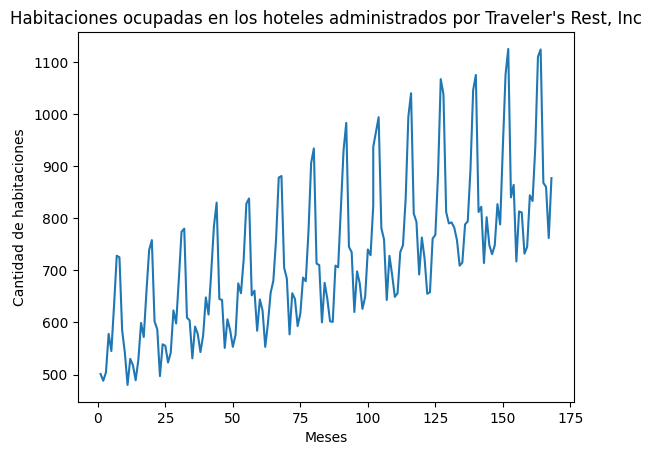

In [27]:
plt.plot(df['t'],df['Yt'])
plt.title("Habitaciones ocupadas en los hoteles administrados por Traveler's Rest, Inc")
plt.xlabel("Meses")
plt.ylabel("Cantidad de habitaciones")
plt.show()

Podemos observar que la gráfica de nuestra serie de tiempo, presenta tendencia creciente, por lo que la media no es constante.
Dicho esto, procederemos a identificar si nuestra serie tiene algún tipo de patrón estacional, esto lo haremos mediante la ACF y la PACF.

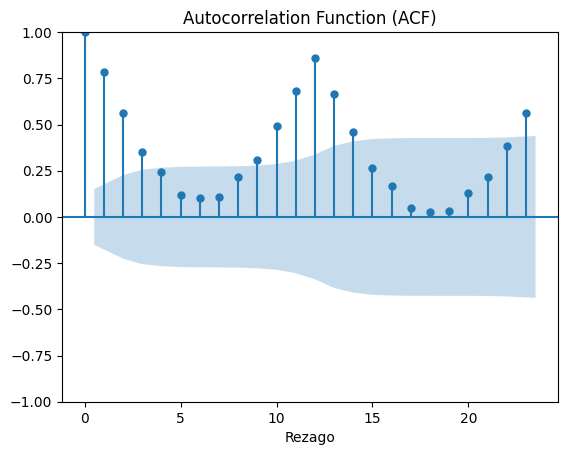

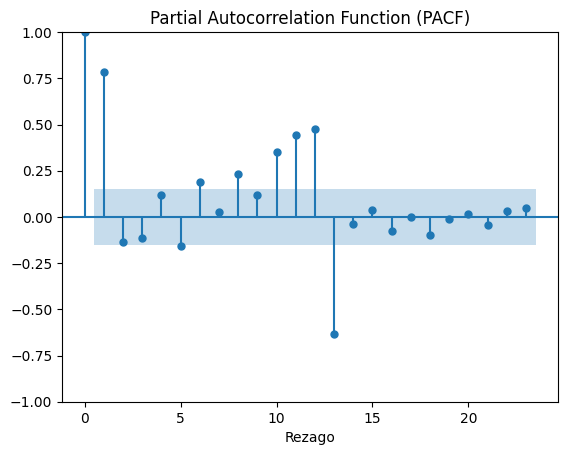

In [6]:
plot_acf(df['Yt'])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Rezago")
plt.show()

plot_pacf(df['Yt'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel("Rezago")
plt.show()

Como podemos observar en las gráficas de la ACF y la PACF, tenemos barras significativas que se repiten en intervalos regulares, es decir, nos indican que ciertos patrones o ciclos se repiten en la serie temporal, lo que es característico de la estacionalidad. Por lo que podemos concluir que sí existe algún tipo de patrón estacional.
También verificaremos si es necesario aplicar una transformación a la serie mediante el Test de Levene. 

In [46]:
variances = df.var(axis=1)
statistic, p_value = levene(*df.values.T)

print("Estadístico de prueba de Levene:", statistic)
print("Valor p:", p_value)

Estadístico de prueba de Levene: 95.79686550918912
Valor p: 4.698941671986663e-20


Como el valor p es menor que un nivel de significancia específico (tomamos $\alpha = 0.05$), significa que hay suficiente evidencia para aplicar una transformación.

Valor de lambda estimado: -0.5212786160037145


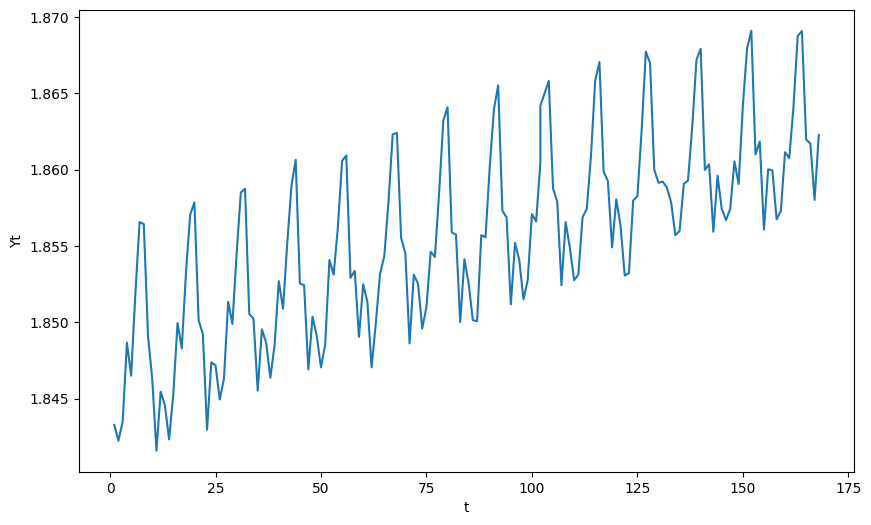

In [43]:
transformed_data, lambda_value = boxcox(df['Yt'])
plt.figure(figsize=(10, 6))
plt.plot(df['t'], transformed_data, label='Datos transformados (Box-Cox)')
plt.xlabel('t')
plt.ylabel('Yt')

# Imprimimos el valor de lambda estimado
print("Valor de lambda estimado:", lambda_value)

Como podemos observar, después de haber aplicado una transformación a la serie, tenemos una reducción considerable en el eje vertical, lo cual nos indica que que la variabilidad se estabilizó. Además, podemos notar que todos los picos de la serie son similares en cuanto a la altura, lo cual, nos da indicios de que logramos una fluctuación estacional constante.


# Actividad 9.2
1. Revise la sección 4.2.1 en Giraldo (2006), referente a modelos con variables indicadoras.
2. En el problema de Traveler ́s Rest, Inc. (tabla 9-1), utilice R para realizar una regresión con variables ficticias sobre la serie con estacionalidad constante y pronosticar los promedios de las habitaciones de hotel ocupadas en los meses 169 y 170 con un intervalo de confianza del 95%. Compruebe los supuestos referentes a los residuales del modelo.

## Parte Raúl